# LLM 20 Questions Keywords Analysis

According to kaggle discussion, the keywords are consisted of 500 location (from keywords.py), 500 things (from keywords.py), and 1000 new things (the hidden set).
https://www.kaggle.com/competitions/llm-20-questions/discussion/515102

In [4]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Load keywords.py in dataframes

In [10]:
def create_keyword_df(KEYWORDS_JSON):
    json_data = json.loads(KEYWORDS_JSON)

    keyword_list = []
    category_list = []
    alts_list = []

    for i in range(len(json_data)):
        for j in range(len(json_data[i]['words'])):
            keyword = json_data[i]['words'][j]['keyword']
            keyword_list.append(keyword)
            category_list.append(json_data[i]['category'])
            alts_list.append(json_data[i]['words'][j]['alts'])

    data_pd = pd.DataFrame(columns=['keyword', 'category', 'alts'])
    data_pd['keyword'] = keyword_list
    data_pd['category'] = category_list
    data_pd['alts'] = alts_list
    
    return data_pd


As described in the discussion, the keywords are consisted of 500 location (from keywords.py), 500 things (from keywords.py)

In [11]:
keyword_df = create_keyword_df(KEYWORDS_JSON)
keyword_df = keyword_df.dropna()
keyword_df.value_counts('category')

category
city        324
country     190
landmark     49
dtype: int64

### Place

In [12]:
place_df = keyword_df[keyword_df['category'] == 'place']
place_df

,keyword,category,alts


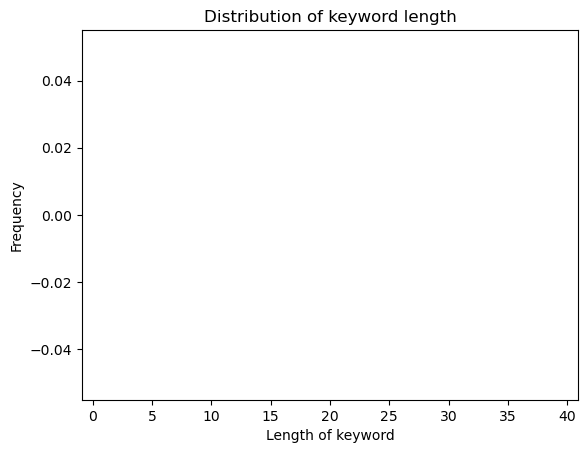

In [8]:
# bin the length of the keyword and plot
place_df['keyword_len'] = place_df['keyword'].apply(len)

plt.hist(place_df['keyword_len'], bins=range(1, 40))
plt.xlabel('Length of keyword')
plt.ylabel('Frequency')
plt.title('Distribution of keyword length')
plt.show()

/var/folders/h0/74vp_7dd0wbcv7q2f9w9l8qc0000gn/T/ipykernel_64084/839350730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  place_df['first_letter'] = place_df['keyword'].apply(lambda x: x[0].upper())


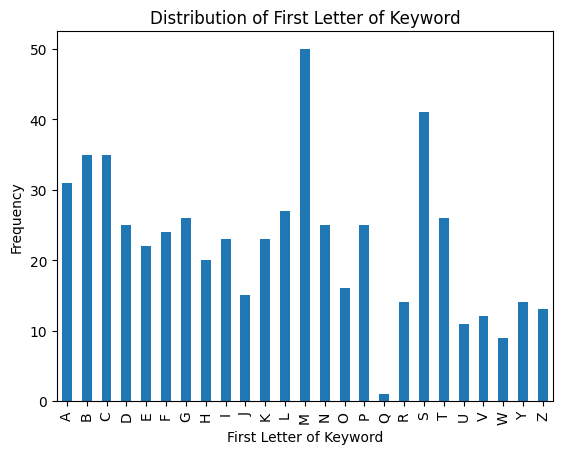

In [7]:
place_df['first_letter'] = place_df['keyword'].apply(lambda x: x[0].upper())

place_letter_counts = place_df['first_letter'].value_counts()

# Plotting the distribution of first letters as a bar chart
place_letter_counts.sort_index().plot(kind='bar')
plt.xlabel('First Letter of Keyword')
plt.ylabel('Frequency')
plt.title('Distribution of First Letter of Keyword')
plt.show()

### Things

In [8]:
things_df = keyword_df[keyword_df['category'] == 'things']
things_df

,keyword,category,alts
0,Advertisement,things,[]
1,Agave,things,[]
2,Air compressor,things,[]
3,Air Conditioner,things,[Air Conditioning]
4,Air filter,things,[]
...,...,...,...
574,Wristband,things,[]
575,Yoga Block,things,[]
576,Yoga mat,things,[]
577,Yogurt,things,[]


/var/folders/h0/74vp_7dd0wbcv7q2f9w9l8qc0000gn/T/ipykernel_64084/1168256080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  place_df['first_letter'] = things_df['keyword'].apply(lambda x: x[0].upper())
/var/folders/h0/74vp_7dd0wbcv7q2f9w9l8qc0000gn/T/ipykernel_64084/1168256080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  things_df['keyword_len'] = things_df['keyword'].apply(len)


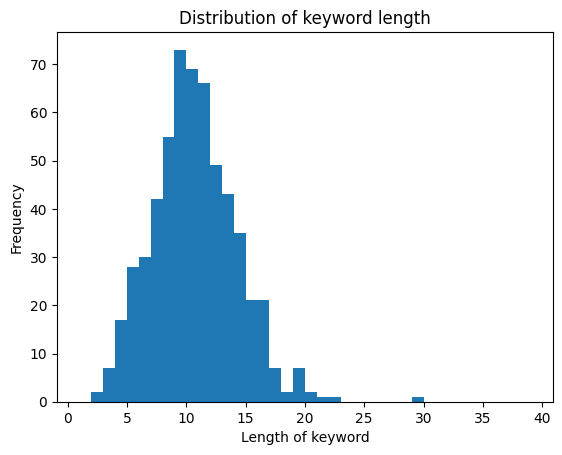

In [9]:
place_df['first_letter'] = things_df['keyword'].apply(lambda x: x[0].upper())

# bin the length of the keyword and plot
things_df['keyword_len'] = things_df['keyword'].apply(len)

plt.hist(things_df['keyword_len'], bins=range(1, 40))
plt.xlabel('Length of keyword')
plt.ylabel('Frequency')
plt.title('Distribution of keyword length')
plt.show()

/var/folders/h0/74vp_7dd0wbcv7q2f9w9l8qc0000gn/T/ipykernel_64084/2592858037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  things_df['first_letter'] = things_df['keyword'].apply(lambda x: x[0].upper())


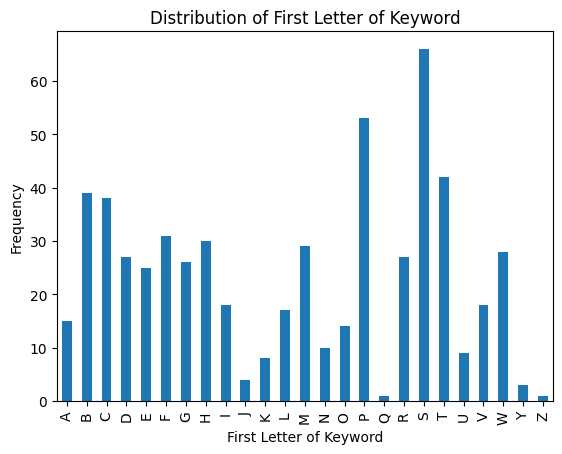

In [10]:
things_df['first_letter'] = things_df['keyword'].apply(lambda x: x[0].upper())

things_letter_counts = things_df['first_letter'].value_counts()

# Plotting the distribution of first letters as a bar chart
things_letter_counts.sort_index().plot(kind='bar')
plt.xlabel('First Letter of Keyword')
plt.ylabel('Frequency')
plt.title('Distribution of First Letter of Keyword')
plt.show()